# Exercise 1

The pokedex table containing basic data about each pokemon is available at https://pokemondb.net/pokedex/all

## Step 1.1

Extract all the table rows as a list. How many rows are there (including the header row)?

In [3]:
# requests, BeautifulSoup modules imported

import requests
from bs4 import BeautifulSoup

# scraped through the pokedex url and stored all rows in the pokedex in "poke_list"
# printed the total number of rows in the table

poke_url = "https://pokemondb.net/pokedex/all"
poke_page = requests.get(poke_url)
poke_soup = BeautifulSoup(poke_page.text, "html.parser")
poke_list = poke_soup.find_all(name = "table", class_ = "data-table block-wide")

print("The total number of rows in the table is -", len(poke_list[0].find_all("tr")))

The total number of rows in the table is - 1035


## Step 1.2

Extract and print the following contents from that row. 

- The name of the pokemon
- The url to the pokemon's page
- The type or types (as a string separated by spaces, e.g. "Fire Flying")
- The total points
- In a single list (via appending):  ID Number, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed

In [4]:
# selected the first row of the table and stored it in "bulbasaur" in order to print out the required information

bulbasaur = poke_soup.tbody.find_all("tr")[0]

# name of the pokemon
print("The name of the pokemon is -", bulbasaur.find("a").text)

# url to the pokemon page
print("The URL to the pokemon's page is - https://pokemondb.net" + str(bulbasaur.find("a").get("href")))

# type of pokemon
t = []

for x in bulbasaur.find_all(name = "a", class_ = "type-icon"):
    t.append(x.text)

poke_types = " ".join(t)
print("The pokemon types are -", poke_types)

# total points
print("The total points of the pokemon is -", bulbasaur.find("td", class_ = "cell-total").text)

# list of remaining pokemon stats
points = []
for y in bulbasaur.find_all(name = "td", class_ = "cell-num"):
    points.append(y.text)

print("The ID Number, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed of the pokemon are -", points)

The name of the pokemon is - Bulbasaur
The URL to the pokemon's page is - https://pokemondb.net/pokedex/bulbasaur
The pokemon types are - Grass Poison
The total points of the pokemon is - 318
The ID Number, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed of the pokemon are - ['001', '45', '49', '49', '65', '65', '45']


## Step 1.3

Generalize step 1.2. Define a function that takes in a row of the pokedex table and returns it as a DataFrame with a single row. Create a single DataFrame by appending these rows.

In [5]:
# numpy, pandas modules imported
# created a list "unique_types" to store all unique pokemon types in the pokedex
# defined function "pokemon" to scrape through a given pokemon's page given its row value "row" in the pokedex as an argument

import numpy as np
import pandas as pd

global t2
t1 = []
unique_types = []
for a in poke_soup.find_all(name = "a", class_ = "type-icon"):
    t1.append(a.text)
for b in t1:
    if b not in unique_types:
        unique_types.append(b)

def pokemon(row):
    global df
    pk = poke_soup.tbody.find_all("tr")[row]
    
    # extracts name
    pk_name = pk.find("a").text
    
    # extracts type
    t2 = []
        
    for x in pk.find_all(name = "a", class_ = "type-icon"):
        t2.append(x.text)
    
    p1 = " ".join(t2)
    
    # extracts total points
    tot = pk.find("td", class_ = "cell-total").text
    
    # extracts remaining stats and stores it all in "ps"
    ps = []
    
    for y in pk.find_all(name = "td", class_ = "cell-num"):
        ps.append(y.text)
    
    srno = ps[0]
    hp = ps[1]
    att = ps[2]
    deff = ps[3]
    spatt = ps[4]
    spdef = ps[5]
    speed = ps[6]
    
    temp_row = np.array([[srno, pk_name, p1, tot, hp, att, deff, spatt, spdef, speed]])
    
    # created a dataframe to store all values extracted above
    df = pd.DataFrame(temp_row)
    
    # the below code creates dummy variables for all unique types of pokemon, which shall be used later for step 2.2
    # first for loop creates columns for all types of pokemon, keeping their default values as 0
    # second for loop changes the value of the specific type column to 1 if that is the pokemon's type
    
    for w in range(0, len(unique_types)):
        df[unique_types[w]] = 0
    
    for z in t2:
        if z in unique_types:
            df[z] = 1
    
    # creates a new column "Sample" in the dataframe and by default stores 0 as its value; this shall be used for step 2.4
    
    df["Sample"] = 0
    
    # creates a new column "pk_url" in the dataframe and stores the url of the pokemon's page as its value; this shall be used for step 2.4

    df["pk_url"] = pk.find("a").get("href")
    
    # returns the subset of the dataframe that matches all the information as shown in the pokedex webpage
    
    return df[df.columns[0:10]]

# called the function for the first row of the pokedex

pokemon(0)

,0,1,2,3,4,5,6,7,8,9
0,001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45


# Exercise 2

In [6]:
# empty list "dfs" created to store every individual entry of the pokedex in the webpage, which shall then be stored in a dataframe "pokedex"
# the function "pokemon" has been called for getting all row information for each pokemon in the pokedex
# we already know there are 1035 rows in the pokedex including the header (from step 1.1), so there are a total of 1034 pokemon rows to scrape through

dfs = []

for x in range(0,1034):
    pokemon(x)
    dfs.append(df)

pokedex = pd.concat(dfs)
pokedex.head()

,0,1,2,3,4,5,6,7,8,9,...,Psychic,Ground,Ice,Steel,Fairy,Fighting,Rock,Ghost,Sample,pk_url
0,001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,...,0,0,0,0,0,0,0,0,0,/pokedex/bulbasaur
0,002,Ivysaur,Grass Poison,405,60,62,63,80,80,60,...,0,0,0,0,0,0,0,0,0,/pokedex/ivysaur
0,003,Venusaur,Grass Poison,525,80,82,83,100,100,80,...,0,0,0,0,0,0,0,0,0,/pokedex/venusaur
0,003,Venusaur,Grass Poison,625,80,100,123,122,120,80,...,0,0,0,0,0,0,0,0,0,/pokedex/venusaur
0,004,Charmander,Fire,309,39,52,43,60,50,65,...,0,0,0,0,0,0,0,0,0,/pokedex/charmander


## Step 2.1

Add column names to the DataFrame. Convert strings to numeric where appropriate. Make the ID number the first column in the DataFrame if it is not already.

In [7]:
# column names are added to "pokedex"
# ID no. is set as index of this dataframe
# every stat value is converted to "int" type

pokedex.columns = ["No.", "Name", "Type", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Grass", "Poison", "Fire", "Flying", "Dragon", "Water", "Bug", "Normal", "Dark", "Electric", "Psychic", "Ground", "Ice", "Steel", "Fairy", "Fighting", "Rock", "Ghost", "Sample", "pk_url"]
pokedex.set_index("No.", inplace = True)
pokedex[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]] = pokedex[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]].apply(pd.to_numeric)

pokedex[pokedex.columns[0:9]].head()

,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
No.,,,,,,,,,
001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
003,Venusaur,Grass Poison,525,80,82,83,100,100,80
003,Venusaur,Grass Poison,625,80,100,123,122,120,80
004,Charmander,Fire,309,39,52,43,60,50,65


## Step 2.2

Create 18 dummy variables for each type of pokemon.

In [8]:
# the dummy variables were created in the function "pokemon" itself and consequently stored in "pokedex" above, so the appropriate rows of "pokedex" are displayed

pokedex[pokedex.columns[0:27]].head(10)

,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Grass,...,Dark,Electric,Psychic,Ground,Ice,Steel,Fairy,Fighting,Rock,Ghost
No.,,,,,,,,,,,,,,,,,,,,,
001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,1,...,0,0,0,0,0,0,0,0,0,0
002,Ivysaur,Grass Poison,405,60,62,63,80,80,60,1,...,0,0,0,0,0,0,0,0,0,0
003,Venusaur,Grass Poison,525,80,82,83,100,100,80,1,...,0,0,0,0,0,0,0,0,0,0
003,Venusaur,Grass Poison,625,80,100,123,122,120,80,1,...,0,0,0,0,0,0,0,0,0,0
004,Charmander,Fire,309,39,52,43,60,50,65,0,...,0,0,0,0,0,0,0,0,0,0
005,Charmeleon,Fire,405,58,64,58,80,65,80,0,...,0,0,0,0,0,0,0,0,0,0
006,Charizard,Fire Flying,534,78,84,78,109,85,100,0,...,0,0,0,0,0,0,0,0,0,0
006,Charizard,Fire Dragon,634,78,130,111,130,85,100,0,...,0,0,0,0,0,0,0,0,0,0
006,Charizard,Fire Flying,634,78,104,78,159,115,100,0,...,0,0,0,0,0,0,0,0,0,0


## Step 2.3

Remove duplicate values of pokemon based on the URL. Keep the first observation in the case of a duplicate. Print the number of rows in the deduplicated dataset.

In [31]:
# copy of "pokedex" created called "pokedex_copy"
# duplicate values are removed on "pokedex_copy"

pokedex_copy = pokedex.copy()
pokedex_copy.drop_duplicates(subset = "pk_url", keep = "first", inplace = True)

# printed the deduplicated dataset and the number of rows in it

print("The number of rows in the deduplicated dataset is -", len(pokedex_copy))
pokedex_copy[pokedex_copy.columns[0:27]].head(10)

The number of rows in the deduplicated dataset is - 893


,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Grass,...,Dark,Electric,Psychic,Ground,Ice,Steel,Fairy,Fighting,Rock,Ghost
No.,,,,,,,,,,,,,,,,,,,,,
001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,1,...,0,0,0,0,0,0,0,0,0,0
002,Ivysaur,Grass Poison,405,60,62,63,80,80,60,1,...,0,0,0,0,0,0,0,0,0,0
003,Venusaur,Grass Poison,525,80,82,83,100,100,80,1,...,0,0,0,0,0,0,0,0,0,0
004,Charmander,Fire,309,39,52,43,60,50,65,0,...,0,0,0,0,0,0,0,0,0,0
005,Charmeleon,Fire,405,58,64,58,80,65,80,0,...,0,0,0,0,0,0,0,0,0,0
006,Charizard,Fire Flying,534,78,84,78,109,85,100,0,...,0,0,0,0,0,0,0,0,0,0
007,Squirtle,Water,314,44,48,65,50,64,43,0,...,0,0,0,0,0,0,0,0,0,0
008,Wartortle,Water,405,59,63,80,65,80,58,0,...,0,0,0,0,0,0,0,0,0,0
009,Blastoise,Water,530,79,83,100,85,105,78,0,...,0,0,0,0,0,0,0,0,0,0


## Step 2.4

For the next exercise, we wish to create a sample of the pokemon. Add a dummy variable to the DataFrame called "sample" that tags every 4th pokemon to be included in the sample. For example, if the pokemon were [A, B, C, D, E, F, G, H, I], pokemon D and H would be in the sample.

In [10]:
# a sample is created consisting of every fourth pokemon in the deduplicated pokedex
# the value in the column "Sample" (created previously) is changed to 1 for every fourth pokemon

for x in pokedex_copy.index:
    a = int(x)
    
    if a % 4 == 0:
        pokedex_copy.at[x, "Sample"] = 1
    else:
        pokedex_copy.at[x, "Sample"] = 0

pokedex_copy[pokedex_copy.columns[0:28]].head(10)

,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Grass,...,Electric,Psychic,Ground,Ice,Steel,Fairy,Fighting,Rock,Ghost,Sample
No.,,,,,,,,,,,,,,,,,,,,,
001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,1,...,0,0,0,0,0,0,0,0,0,0
002,Ivysaur,Grass Poison,405,60,62,63,80,80,60,1,...,0,0,0,0,0,0,0,0,0,0
003,Venusaur,Grass Poison,525,80,82,83,100,100,80,1,...,0,0,0,0,0,0,0,0,0,0
004,Charmander,Fire,309,39,52,43,60,50,65,0,...,0,0,0,0,0,0,0,0,0,1
005,Charmeleon,Fire,405,58,64,58,80,65,80,0,...,0,0,0,0,0,0,0,0,0,0
006,Charizard,Fire Flying,534,78,84,78,109,85,100,0,...,0,0,0,0,0,0,0,0,0,0
007,Squirtle,Water,314,44,48,65,50,64,43,0,...,0,0,0,0,0,0,0,0,0,0
008,Wartortle,Water,405,59,63,80,65,80,58,0,...,0,0,0,0,0,0,0,0,0,1
009,Blastoise,Water,530,79,83,100,85,105,78,0,...,0,0,0,0,0,0,0,0,0,0


# Exercise 3

## Step 3.1

Scrape the main image for Bulbasaur in a general way that could be applied to other pokemon pages by searching for the relevant tag and extracting the image URL.  Display the image.

Row number of original pokedex entered (between 0 & 1033) - 0
The name of the pokemon is - Bulbasaur


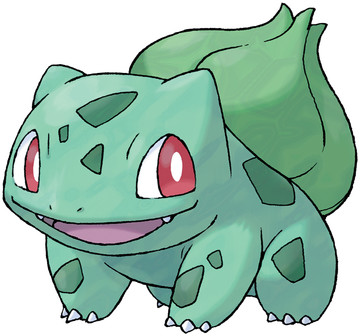

In [11]:
# ipython.display imported
# function "get_image" created that takes in a row number of the original pokedex (containing duplicates) and returns the image of the pokemon in that row

import IPython.display as Disp

def get_image(row_no):
    print("Row number of original pokedex entered (between 0 & 1033) -", str(row_no))
    p = poke_soup.tbody.find_all("tr")[row_no]
    pname = p.find("a").text
    print("The name of the pokemon is -", pname)
    
    # image url is generated below and the image is returned
    
    lpname = pname.lower()
    img_url = "https://img.pokemondb.net/artwork/" + lpname + ".jpg"
    return Disp.Image(requests.get(img_url).content)

# image of the first pokemon in the pokedex is displayed

get_image(0)

## Step 3.2

Extract the location table and display the same in a DataFrame.

In [12]:
# all tables in the first pokemon's page are extracted, from which the location table is displayed as a dataframe "loc"
# index of -2 is used here, since the location table we need is almost always second to last in the list of tables

tables = pd.read_html(requests.get("https://pokemondb.net/pokedex/bulbasaur", headers = {'User-agent': 'Mozilla/5.0'}).text)
loc = pd.DataFrame(tables[-2])
loc.columns = ["Video Game", "Location"]
loc.set_index("Video Game", inplace = True)
loc1 = loc.copy()

loc.head(15)

,Location
Video Game,
RedBlue,Pallet Town
Yellow,Cerulean City
GoldSilverCrystal,Trade/migrate from another game
RubySapphire,Trade/migrate from another game
FireRedLeafGreen,Pallet Town
Emerald,Trade/migrate from another game
DiamondPearlPlatinum,Trade/migrate from another game
HeartGoldSoulSilver,Pallet Town
BlackWhiteBlack 2White 2,Trade/migrate from another game


## Step 3.3

Transpose the DataFrame such that each column is a video game and each row/cell is the location where you find Bulbasaur in that game.

In [13]:
# location table transposed

loc.transpose()

Video Game,RedBlue,Yellow,GoldSilverCrystal,RubySapphire,FireRedLeafGreen,Emerald,DiamondPearlPlatinum,HeartGoldSoulSilver,BlackWhiteBlack 2White 2,XY,Omega RubyAlpha Sapphire,SunMoon,Ultra SunUltra Moon,Let's Go PikachuLet's Go Eevee,SwordShield
Location,Pallet Town,Cerulean City,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,Trade/migrate from another game,Lumiose City,Trade/migrate from another game,Trade/migrate from another game,Route 2,"Cerulean City, Viridian Forest",Location data not yet available


## Step 3.4

Extract the location table and check if the 'XY' is in the DataFrame. If so, create a new DataFrame with only the name of the pokemon and the 'XY location' column.

In [14]:
# time module imported
# in the deduplicated pokedex ("pokedex_copy"), we scrape through the webpages of every pokemon that is part of the sample (as generated in step 2.4)
# list "a" contains names of all pokemon in the sample, on which we perform a few data tidying actions and also removed "Melton"

import time

a = []

for x in pokedex_copy.index:
    if pokedex_copy.at[x, "Sample"] == 1:
        a.append(pokedex_copy.at[x, "Name"])

for n, i in enumerate(a):
    if i == "Nidoran♂":
        a[n] = "Nidoran-m"
    elif i == "Tapu Fini":
        a[n] = "Tapu-fini"
    elif i == "Type: Null":
        a[n] = "Type-Null"

a.remove("Meltan")

print("The number of pokemon in the sample is -", len(a))

# a dataframe "all_sample_loc" is created that stores the locations of all pokemon in the sample, using a dictionary "b", whose keys are the pokemon in the sample and their values are the location tables

b = {}
all_sample_loc = pd.DataFrame()

for y in a:
    time.sleep(0.1)
    temp = pd.read_html(requests.get("https://pokemondb.net/pokedex/" + str(y), headers = {'User-agent': 'Mozilla/5.0'}).text)
    b[y] = temp[-2]
    all_sample_loc = pd.concat(b)
    #all_sample_loc.columns = [b.keys(y), 'Location']
    #t2 = all_sample_loc.set_index(b.keys(y)).transpose()
    #t2['URL'] = b.keys(y)
    #Location = Location.append(t2, sort = True)

# "all_sample_loc" is cleaned and appropriate column names and index are set

all_sample_loc = all_sample_loc.reset_index(level = [0, 1])
all_sample_loc = all_sample_loc.drop(['level_1', 'Acc.', 'Cat.', 'Generation 8', 'Move', 'Power', 'TR', 'Type'], axis = 1)
all_sample_loc.columns = ["Pokemon", "Video Game", "Location"]
all_sample_loc.set_index("Pokemon", inplace = True)

# a subset of "all_sample_loc" called "all_sample_loc_xy" is created that contains only XY locations

all_sample_loc_xy = all_sample_loc.loc[all_sample_loc["Video Game"] == "XY"]
all_sample_loc_xy = all_sample_loc_xy.drop("Video Game", axis = 1)
all_sample_loc_xy = all_sample_loc_xy.rename(columns = {"Location": "XY Location"})
print("The number of pokemon that contain XY locations is -", len(all_sample_loc_xy))

all_sample_loc_xy

The number of pokemon in the sample is - 222
The number of pokemon that contain XY locations is - 141


,XY Location
Pokemon,
Abomasnow,Route 17
Ambipom,Trade/migrate from another game
Arbok,Route 19
Ariados,"Terminus Cave, Victory Road"
Articuno,"Sea Spirit's Den, Roaming Kalos"
Azumarill,Route 22
Bergmite,Frost Cavern
Bibarel,Route 22
Braviary,Trade/migrate from another game


# Exercise 4

## Step 4.1

Use the full sample of pokemon from the pokedex DataFrame. Create a table that shows the average attack and defense for each type. Each type should be a row. Average attack and defense should be columns. Which type has the highest and lowest average attack? Average defense?

In [28]:
# created a copy of "pokedex" called "pokedex2", changed its index to integers and cleaned the dataframe

ind = []
pokedex2 = pokedex.copy()

for i in range(1, 1035):
    ind.append(i)

del pokedex2["Sample"]
del pokedex2["pk_url"]
pokedex2["Index"] = ind
pokedex2.set_index("Index", inplace = True)
pokedex2.head()

# statistics module imported
# "att" and "deff" are lists of lists that contain values of attack and defence of each type (18 types so size of both is 18)
# dictionary "a" contains pokemon types as keys and their corresponding average attack and defense points as its values
# dataframe "avg_val" contains the required stats

import statistics

att = []
deff = []
a = {}

for z in range(0,18):
    att.append([])
    deff.append([])

for y in unique_types:
    for x in pokedex2.index:    
        if pokedex2.at[x, y] == 1:
            att[unique_types.index(y)].append(int(pokedex2.at[x, 'Attack']))
            deff[unique_types.index(y)].append(int(pokedex2.at[x, 'Defense']))

for m in unique_types:
    a[m] = statistics.mean(att[unique_types.index(m)]), statistics.mean(deff[unique_types.index(m)])

avg = pd.DataFrame(a)
avg_val = avg.transpose()
avg_val.columns = ["Average Attack", "Average Defense"]
avg_val.index.name = "Type"

print("The highest", avg_val[['Average Attack']].idxmax())
print("The lowest", avg_val[['Average Attack']].idxmin())
print("The highest", avg_val[['Average Defense']].idxmax())
print("The lowest", avg_val[['Average Defense']].idxmin())

avg_val.head(20)

The highest Average Attack    Fighting
dtype: object
The lowest Average Attack    Fairy
dtype: object
The highest Average Defense    Steel
dtype: object
The lowest Average Defense    Normal
dtype: object


,Average Attack,Average Defense
Type,,
Grass,75.533898,74.101695
Poison,72.192308,68.243590
Fire,84.560976,70.170732
Flying,80.042735,68.111111
Dragon,101.277778,88.555556
Water,74.818182,74.922078
Bug,71.188889,71.166667
Normal,73.833333,60.936508
Dark,92.291667,68.097222


## Step 4.2

Join the pokedex data to the  location DataFrame created in Step 3.4 (exclude pokemon that are not in the sample). For the locations in pokemon XY, calculate the average total points for each location. Which location has the highest average total point score?

In [16]:
# created copy of "pokedex_copy" and set "Name" as index
# joined "Total Points" column values for each corresponding pokemon in "all_sample_loc_xy" (which contains all XY locations of the pokemon in the sample)

pokedex3 = pokedex_copy.copy()
pokedex3.set_index("Name", inplace = True)

for x in all_sample_loc_xy.index:
    if x == "Nidoran-m":
        all_sample_loc_xy.loc[x,"Total Points"] = int(pokedex3.at["Nidoran♂", "Total"]) 
    elif x == "Tapu-fini":
        all_sample_loc_xy.loc[x,"Total Points"] = int(pokedex3.at["Tapu Fini", "Total"])
    elif x == "Type-Null":
        all_sample_loc_xy.loc[x,"Total Points"] = int(pokedex3.at["Type: Null", "Total"])
    else:
        all_sample_loc_xy.loc[x,"Total Points"] = int(pokedex3.at[x, "Total"])

# created a copy of "all_sample_loc_xy" called "all_sample_loc_xy_copy" and changed its index to integers

indd = []
all_sample_loc_xy_copy = all_sample_loc_xy.copy()

for h in range(1,142):
    indd.append(h)

all_sample_loc_xy_copy["Sr. No."] = indd
all_sample_loc_xy_copy.set_index("Sr. No.", inplace = True)

# list "tp" contains all "Total Points" for each unique location from XY
# dictionary "avg_tp" contains each unique XY location as its keys and the corresponding average "Total Points" as their values
# the dataframe "avg_total_points" contains each unique XY location and its average "Total Points"

unique_places = []
tp = []
avg_tp = {}
places = list(all_sample_loc_xy_copy["XY Location"].values)

for i in places: 
    if i not in unique_places: 
        unique_places.append(i)

for j in range(0, len(unique_places)):
    tp.append([])

for m in unique_places:
    for n in all_sample_loc_xy_copy.index:
        if all_sample_loc_xy_copy.at[n, "XY Location"] == m:
            tp[unique_places.index(m)].append(int(all_sample_loc_xy_copy.at[n, 'Total Points']))

for o in unique_places:
    avg_tp[o]=statistics.mean(tp[unique_places.index(o)])

avg_tot_points = pd.DataFrame(avg_tp,index=[0])
avg_total_points = avg_tot_points.transpose()
avg_total_points.columns=["Average Total Points"]
avg_total_points.index.name = "XY Location"
print("The XY location with the highest", avg_total_points[['Average Total Points']].idxmax())
avg_total_points.head(80)

The XY location with the highest Average Total Points    Sea Spirit's Den, Roaming Kalos
dtype: object


,Average Total Points
XY Location,
Route 17,494.000000
Trade/migrate from another game,413.254545
Route 19,474.000000
"Terminus Cave, Victory Road",400.000000
"Sea Spirit's Den, Roaming Kalos",580.000000
Route 22,417.666667
Frost Cavern,379.500000
"Route 3, 7",224.000000
Evolve Caterpie/Metapod,395.000000


# Exercise 5

## Step 5.1

Create a new column in the Pokedex DataFrame called sample2 that tags every 12th pokemon.

In [32]:
# created a copy of the original pokedex dataframe with only the required columns

cols = pokedex_copy.columns.tolist()
cols = cols[-1:] + cols[:-1]
pokedex_copy = pokedex_copy[cols]

pokedex3 = pokedex_copy[pokedex_copy.columns[0:10]].copy()
pokedex3["Sample2"] = 0

for x in pokedex3.index:
    a = int(x)
    
    if a % 12 == 0:
        pokedex3.at[x, "Sample2"] = 1
    else:
        pokedex3.at[x, "Sample2"] = 0

pokedex3

,pk_url,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Sample2
No.,,,,,,,,,,,
001,/pokedex/bulbasaur,Bulbasaur,Grass Poison,318,45,49,49,65,65,45,0
002,/pokedex/ivysaur,Ivysaur,Grass Poison,405,60,62,63,80,80,60,0
003,/pokedex/venusaur,Venusaur,Grass Poison,525,80,82,83,100,100,80,0
004,/pokedex/charmander,Charmander,Fire,309,39,52,43,60,50,65,0
005,/pokedex/charmeleon,Charmeleon,Fire,405,58,64,58,80,65,80,0
006,/pokedex/charizard,Charizard,Fire Flying,534,78,84,78,109,85,100,0
007,/pokedex/squirtle,Squirtle,Water,314,44,48,65,50,64,43,0
008,/pokedex/wartortle,Wartortle,Water,405,59,63,80,65,80,58,0
009,/pokedex/blastoise,Blastoise,Water,530,79,83,100,85,105,78,0


## Step 5.2

Scrape the photo URLs for each pokemon in sample2.

In [38]:
# created a dataframe "smaller_sample" that contains only the pokemon in sample2

smaller_sample = pokedex3.copy()

for x in smaller_sample.index:
    if smaller_sample.at[x, "Sample2"] == 0:
        smaller_sample.drop(x, inplace = True)

smaller_sample["Image URL"] = " "

# function to extract the image URLs for every pokemon in the above dataframe

def extract_img_url(poke_page_url):
    
    poke_url1 = "https://pokemondb.net" + str(poke_page_url)
    poke_page1 = requests.get(poke_url1)
    poke_soup1 = BeautifulSoup(poke_page1.text, "html.parser")
    img_url = poke_soup1.find(name = "img").get("src")
    
    return img_url

# extracted all required image URLs

for y in smaller_sample.index:
    smaller_sample.at[y, "Image URL"] = extract_img_url(str(smaller_sample.at[y, "pk_url"]))
    
smaller_sample.rename(columns = {"pk_url": "Pokemon Page URL"}, inplace = True)
smaller_sample.reset_index(drop = True, inplace = True)
smaller_sample.index = smaller_sample.index + 1
smaller_sample

,Pokemon Page URL,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Sample2,Image URL
1,/pokedex/butterfree,Butterfree,Bug Flying,395,60,45,50,90,80,70,1,https://img.pokemondb.net/artwork/butterfree.jpg
2,/pokedex/arbok,Arbok,Poison,448,60,95,69,65,79,80,1,https://img.pokemondb.net/artwork/arbok.jpg
3,/pokedex/clefable,Clefable,Fairy,483,95,70,73,95,90,60,1,https://img.pokemondb.net/artwork/clefable.jpg
4,/pokedex/venonat,Venonat,Bug Poison,305,60,55,50,40,55,45,1,https://img.pokemondb.net/artwork/venonat.jpg
5,/pokedex/poliwag,Poliwag,Water,300,40,50,40,40,40,90,1,https://img.pokemondb.net/artwork/poliwag.jpg
6,/pokedex/tentacool,Tentacool,Water Poison,335,40,40,35,50,100,70,1,https://img.pokemondb.net/artwork/tentacool.jpg
7,/pokedex/doduo,Doduo,Normal Flying,310,35,85,45,35,35,75,1,https://img.pokemondb.net/artwork/doduo.jpg
8,/pokedex/drowzee,Drowzee,Psychic,328,60,48,45,43,90,42,1,https://img.pokemondb.net/artwork/drowzee.jpg
9,/pokedex/lickitung,Lickitung,Normal,385,90,55,75,60,75,30,1,https://img.pokemondb.net/artwork/lickitung.jpg
10,/pokedex/staryu,Staryu,Water,340,30,45,55,70,55,85,1,https://img.pokemondb.net/artwork/staryu.jpg


## Step 5.3

Display the photos for all of the sample2 pokemon.

In [39]:
# displayed images of all pokemon in "smaller_sample"

from IPython.core.display import Image, display

for z in smaller_sample["Image URL"]:
    display(Image(url = str(z), unconfined = True))

# Exercise 6

## Step 6.1

Scrape the location table for Bulbasaur properly and add it to a DataFrame. When multiple columns are combined, separate the columns and duplicate the location information. For example, the column "Red Blue" that contains "Pallet Town"  will become two columns "Red" with location "Pallet Town" and "Blue" with location "Pallet Town." Transpose the DataFrame so the video game (e.g. "Red") is the column name.

In [40]:
# extracted all games and the location of the pokemon in those games from the page of "Bulbasaur" and stored it in the dictionary "bulba_loc"

po = "https://pokemondb.net/pokedex/bulbasaur"
pg = requests.get(po)
psoup1 = BeautifulSoup(pg.text, "html.parser")
tables = psoup1.find_all(name = "table", class_ = "vitals-table")
locs = tables[-2].find_all(name = "tr")
games = psoup1.find_all(name = "span", class_ = "igame")

game_names = []

for i in games:
    game_names.append(i.text)

# extracted all games

global game_names1
game_names1 = []
[game_names1.append(j) for j in game_names if j not in game_names1]
    
global bulba_loc
bulba_loc = {}
bulba_loc["Pokemon"] = "Bulbasaur"

# extracted all locations of the pokemon in each game

for a in locs:
    temp = []
    temp1 = []
    temp2 = []

    temp = a.find_all(name = "span", class_ = "igame")

    for b in temp:
        temp1.append(b.text)

    for c in game_names1:
        if c in temp1:
            temp2 = a.find_all(name = "td")

            for d in temp2:
                bulba_loc[c] = d.text

# converted the dictionary "bulba_loc" to a dataframe        

global bulba_loc_df
bulba_loc_df = pd.DataFrame(bulba_loc, index = [0])
bulba_loc_df

,Pokemon,Red,Blue,Yellow,Gold,Silver,Crystal,Ruby,Sapphire,FireRed,...,Omega Ruby,Alpha Sapphire,Sun,Moon,Ultra Sun,Ultra Moon,Let's Go Pikachu,Let's Go Eevee,Sword,Shield
0,Bulbasaur,Pallet Town,Pallet Town,Cerulean City,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,...,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Route 2,Route 2,"Cerulean City, Viridian Forest","Cerulean City, Viridian Forest",Location data not yet available,Location data not yet available


## Step 6.2

Generalize the above for all pokemon in the original sample. Append all the data together. If information is not available for a pokemon in a particular game, the column should contain NaN. Display the entire table.

In [41]:
# created a function "poke_loc" that extracts all pokemon locations in each game from that specific pokemon's page

def poke_loc(name, pokemon_url):
    po1 = "https://pokemondb.net" + str(pokemon_url)
    pg1 = requests.get(po1)
    psoup2 = BeautifulSoup(pg1.text, "html.parser")
    tables1 = psoup2.find_all(name = "table", class_ = "vitals-table")
    locs1 = tables1[-2].find_all(name = "tr")

    loc_dict = {}
    loc_dict["Pokemon"] = str(name)

    for x in locs1:
        tempo1 = []
        tempo3 = []

        tempo = x.find_all(name = "span", class_ = "igame")

        for y in tempo:
            tempo1.append(y.text)

        tempo2 = x.find_all(name = "td")

        for z in tempo2:
            tempo3.append(z.text)

        for u in tempo1:
            loc_dict[u] = tempo3[0]
    
    return loc_dict

In [42]:
# called the above function for every pokemon in the original database (with duplicates) after removing "Meltan"
# imported the required package

import time

# created a copy of the original dataframe to be used for this activity and tidied the same as required

pokedex1 = pokedex.copy()

rand = []
pokedex1.drop(index = ["808"], inplace = True)

for i in range(1, len(pokedex1) + 1):
    rand.append(i)
    
pokedex1["Sr. No."] = rand
pokedex1.set_index("Sr. No.", inplace = True)

# created a copy of the dataframe where all locations of "Bulbasaur" are stored

poke_locs = bulba_loc_df.copy()
poke_locs.drop(index = [0], inplace = True)
count = 0

# called the above function for all pokemon in "pokedex1" and stored their locations in the dataframe "poke_locs"

for j in range(1, len(pokedex1) + 1):
    time.sleep(0.7)
    count = count + 1
    edict = {}
    edict = poke_loc(str(pokedex1.at[j, "Name"]), pokedex1.at[j, "pk_url"])
    
    for q in bulba_loc_df.columns:
        if q in edict:
            poke_locs.at[count, q] = edict[q]

        else:
            poke_locs.at[count, q] = "Location data not yet available"

poke_locs.set_index("Pokemon", inplace = True)

# displayed the final dataframe containing the locations of all pokemon

poke_locs

,Red,Blue,Yellow,Gold,Silver,Crystal,Ruby,Sapphire,FireRed,LeafGreen,...,Omega Ruby,Alpha Sapphire,Sun,Moon,Ultra Sun,Ultra Moon,Let's Go Pikachu,Let's Go Eevee,Sword,Shield
Pokemon,,,,,,,,,,,,,,,,,,,,,
Bulbasaur,Pallet Town,Pallet Town,Cerulean City,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,Pallet Town,...,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Route 2,Route 2,"Cerulean City, Viridian Forest","Cerulean City, Viridian Forest",Location data not yet available,Location data not yet available
Ivysaur,Evolve Bulbasaur,Evolve Bulbasaur,Evolve Bulbasaur,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Evolve Bulbasaur,Evolve Bulbasaur,...,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Evolve Bulbasaur,Evolve Bulbasaur,Evolve Bulbasaur,Evolve Bulbasaur,Location data not yet available,Location data not yet available
Venusaur,Evolve Bulbasaur/Ivysaur,Evolve Bulbasaur/Ivysaur,Evolve Bulbasaur/Ivysaur,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Evolve Bulbasaur/Ivysaur,Evolve Bulbasaur/Ivysaur,...,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Evolve Bulbasaur/Ivysaur,Evolve Bulbasaur/Ivysaur,Evolve Bulbasaur/Ivysaur,Evolve Bulbasaur/Ivysaur,Location data not yet available,Location data not yet available
Venusaur,Evolve Bulbasaur/Ivysaur,Evolve Bulbasaur/Ivysaur,Evolve Bulbasaur/Ivysaur,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Evolve Bulbasaur/Ivysaur,Evolve Bulbasaur/Ivysaur,...,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Evolve Bulbasaur/Ivysaur,Evolve Bulbasaur/Ivysaur,Evolve Bulbasaur/Ivysaur,Evolve Bulbasaur/Ivysaur,Location data not yet available,Location data not yet available
Charmander,Pallet Town,Pallet Town,Route 24,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Pallet Town,Pallet Town,...,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Route 3,Route 3,"Route 3, 4, 24, Rock Tunnel","Route 3, 4, 24, Rock Tunnel",Location data not yet available,Location data not yet available
Charmeleon,Evolve Charmander,Evolve Charmander,Evolve Charmander,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Evolve Charmander,Evolve Charmander,...,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Evolve Charmander,Evolve Charmander,Evolve Charmander,Evolve Charmander,Location data not yet available,Location data not yet available
Charizard,Evolve Charmander/Charmeleon,Evolve Charmander/Charmeleon,Evolve Charmander/Charmeleon,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Evolve Charmander/Charmeleon,Evolve Charmander/Charmeleon,...,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Evolve Charmander/Charmeleon,Evolve Charmander/Charmeleon,"Route 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15, 1...","Rou

# Exercise 7

## Step 7.1

Join the pokedex data to the location DataFrame created above (exclude pokemon that are not in the sample). For the locations in pokemon game X, calculate the average total points for each location. Which location has the highest average total point score?

In [43]:
# created a copy of the dataframe containing every other 12th pokemon and tidied the same as required

smaller_sample_copy = smaller_sample.copy()
smaller_sample_copy.drop(columns = ["Pokemon Page URL", "Image URL"], inplace = True)

rand1 = []
for i in range(1, len(smaller_sample_copy) + 1):
    rand1.append(i)
    
smaller_sample_copy["Sr. No."] = rand1
smaller_sample_copy.set_index("Sr. No.", inplace = True)

# created a copy of the dataframe containing locations of all pokemon and filtered out the ones not in the smaller sample

poke_locs_copy = poke_locs.copy()
rand2 = []

for j in range(1, len(poke_locs_copy) + 1):
    rand2.append(j)
    
poke_locs_copy["Sr. No."] = rand2
poke_locs_copy = poke_locs_copy.reset_index().set_index("Sr. No.")
poke_locs_copy.drop_duplicates(subset = "Pokemon", keep = "first", inplace = True)
poke_locs_copy.index = np.arange(1, len(poke_locs_copy) + 1)

for k in poke_locs_copy.index:
    if k % 12 != 0:
        poke_locs_copy.drop(k, inplace = True)
        
poke_locs_copy.index = np.arange(1, len(poke_locs_copy) + 1)

# merged the above two dataframes so the resulting dataframe consists of all stats and locations of every pokemon in the sample

for x in smaller_sample_copy.index:
    for y in poke_locs_copy.columns:
        if x in poke_locs_copy.index:
            smaller_sample_copy.at[x, y] = poke_locs_copy.at[x, y]
            
        else:
            smaller_sample_copy.at[x, y] = np.nan

smaller_sample_copy.drop(columns = "Pokemon", inplace = True)
smaller_sample_copy

,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Sample2,...,Omega Ruby,Alpha Sapphire,Sun,Moon,Ultra Sun,Ultra Moon,Let's Go Pikachu,Let's Go Eevee,Sword,Shield
Sr. No.,,,,,,,,,,,,,,,,,,,,,
1,Butterfree,Bug Flying,395,60,45,50,90,80,70,1,...,Trade/migrate from another game,Trade/migrate from another game,"Route 5, Melemele Meadow, Lush Jungle","Route 5, Melemele Meadow, Lush Jungle","Route 5, Melemele Meadow, Lush Jungle","Route 5, Melemele Meadow, Lush Jungle",Viridian Forest,Evolve Caterpie/Metapod,"Rolling Fields, East Lake Axewell, Slumbering ...","Rolling Fields, East Lake Axewell, Slumbering ..."
2,Arbok,Poison,448,60,95,69,65,79,80,1,...,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Route 8,Route 8,Trade/migrate from another game,Evolve Ekans,Location data not yet available,Location data not yet available
3,Clefable,Fairy,483,95,70,73,95,90,60,1,...,Evolve Clefairy/Cleffa,Evolve Clefairy/Cleffa,Evolve Clefairy/Cleffa,Evolve Clefairy/Cleffa,Evolve Clefairy/Cleffa,Evolve Clefairy/Cleffa,Mt. Moon,Mt. Moon,Evolve Clefairy/Cleffa,Evolve Clefairy/Cleffa
4,Venonat,Bug Poison,305,60,55,50,40,55,45,1,...,Breed Venomoth,Breed Venomoth,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,"Route 14, 15, 24, 25","Route 14, 15, 24, 25",Location data not yet available,Location data not yet available
5,Poliwag,Water,300,40,50,40,40,40,90,1,...,Trade/migrate from another game,Trade/migrate from another game,"Brooklet Hill, Malie Garden, Poké Pelago","Brooklet Hill, Malie Garden, Poké Pelago",Brooklet Hill,Brooklet Hill,"Route 22, 23, 25, Cerulean Cave","Route 22, 23, 25, Cerulean Cave",Brawlers' Cave,Brawlers' Cave
6,Tentacool,Water Poison,335,40,40,35,50,100,70,1,...,"Route 103, 105, 106, 107, 108, 109, 110, 115, ...","Route 103, 105, 106, 107, 108, 109, 110, 115, ...","Route 1, 7, 14, 15, Melemele Sea, Kala'e Bay, ...","Route 1, 7, 14, 15, Melemele Sea, Kala'e Bay, ...","Route 7, Melemele Sea, Kala'e Bay, Hau'oli Cit...","Route 7, Melemele Sea, Kala'e Bay, Hau'oli Cit...","Route 4, 10, 11, 12, 13, 18, 19, 20, 21, 24, S...","Route 4, 10, 11, 12, 13, 18, 19, 20, 21, 24, S...","Challenge Beach, Courageous Cavern, Fields of ...","Challenge Beach, Courageous Cavern, Fields of ..."
7,Doduo,Normal Flying,310,35,85,45,35,35,75,1,...,Safari Zone,Safari Zone,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,"Route 16, 17, 18","Route 16, 17, 18",Location data not yet available,Location data not yet available
8,Drowzee,Psychic,328,60,48,45,43,90,42,1,...,Breed Hypno,Breed Hypno,Route 2,Route 2,Route 2,Route 2,Route 11,Route 11,Location data not yet available,Location data not yet available
9,Lickitung,Normal,385,90,55,75,60,75,30,1,...,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Trade/migrate from another game,Poni Gauntlet,Poni Gauntlet,Cerulean Cave,Cerulean Cave,"Brawlers' Cave, Soothing Wetlands","Brawlers' Cave, Soothing Wetlands"


In [44]:
# created a dataframe "final_df" that stores the total points and "X" locations for all pokemon in the smaller sample
# created a dummy variable for every location in "X" and displayed the resulting dataframe

final_df = smaller_sample_copy[["Name", "Total", "X"]]
x_locs = []
x_locs1 = []

for x in final_df["X"]:
    if type(x) is not float:
        x_locs.append(x.split(", "))

for y in x_locs:
    for z in y:
        if len(z) == 2:
                z = "Route " + z

        if z not in x_locs1:
            x_locs1.append(z)
                
for u in x_locs1:
    final_df[u] = 0
    
for p in final_df.index:
    word = final_df.at[p, "X"].split(", ")
    
    for q in word:
        if len(q) == 2:
            q = "Route " + q
            final_df.at[p, q] = 1
        else:
            final_df.at[p, q] = 1
            
final_df

C:\Users\Task_\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Name,Total,X,Evolve Caterpie/Metapod,Route 19,Trade/migrate from another game,Route 14,Route 15,Route 16,Route 21,...,Breed Watchog,Evolve Panpour,Evolve Woobat,Evolve Sandile,Evolve Gothita/Gothorita,Evolve Axew/Fraxure,Lost Hotel,Route 22,Route 7,Location data not yet available
Sr. No.,,,,,,,,,,,,,,,,,,,,,
1,Butterfree,395,Evolve Caterpie/Metapod,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arbok,448,Route 19,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Clefable,483,Trade/migrate from another game,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Venonat,305,Trade/migrate from another game,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Poliwag,300,"Route 14, 15, 16, 19, 21, Laverre City, Frost ...",0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,Tentacool,335,"Route 8, 12, Cyllage City, Ambrette Town, Shal...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Doduo,310,Route 5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Drowzee,328,Trade/migrate from another game,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Lickitung,385,Victory Road,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# calculated the average "Total points" for pokemon found in each location in "X" and stored it in the dataframe "x_locs_tots_df"

cols = final_df.columns.tolist()
del cols[0]
del cols[0]
del cols[0]

x_locs_tots = {}

for a in cols:
    x_locs_tots.setdefault(a, [])

for x in final_df.index:
    for y in cols:
        if final_df.at[x, y] == 1:
            x_locs_tots[y].append(final_df.at[x, "Total"])
            
for z in x_locs_tots:
    x_locs_tots[z] = sum(x_locs_tots[z])/len(x_locs_tots[z])
    
x_locs_tots_df = pd.DataFrame(x_locs_tots, index = ["Average Total Points"]).transpose()
x_locs_tots_df.index.names = ["Locations in X"]
x_locs_tots_df.sort_values(by = "Average Total Points", ascending = False, inplace = True)
x_locs_tots_df

,Average Total Points
Locations in X,
Sea Spirit's Den,580.000000
Roaming Kalos,580.000000
Evolve Axew/Fraxure,540.000000
Evolve Panpour,498.000000
Evolve Anorith,495.000000
Evolve Gothita/Gothorita,490.000000
Route 18,470.000000
Location data not yet available,451.071429
Trade/migrate from another game,434.428571


### As we can observe from the above dataframe, "Sea Spirit's Den" and "Roaming Kalos" both have the highest average total point score (580).